In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os

In [3]:
os.listdir(r'C:\Data_Fajar\Projects_2_Data_Analytics\individual_stocks_5yr')

['AAL_data.csv',
 'AAPL_data.csv',
 'AAP_data.csv',
 'ABBV_data.csv',
 'ABC_data.csv',
 'ABT_data.csv',
 'ACN_data.csv',
 'ADBE_data.csv',
 'ADI_data.csv',
 'ADM_data.csv',
 'ADP_data.csv',
 'ADSK_data.csv',
 'ADS_data.csv',
 'AEE_data.csv',
 'AEP_data.csv',
 'AES_data.csv',
 'AET_data.csv',
 'AFL_data.csv',
 'AGN_data.csv',
 'AIG_data.csv',
 'AIV_data.csv',
 'AIZ_data.csv',
 'AJG_data.csv',
 'AKAM_data.csv',
 'ALB_data.csv',
 'ALGN_data.csv',
 'ALK_data.csv',
 'ALLE_data.csv',
 'ALL_data.csv',
 'ALXN_data.csv',
 'AMAT_data.csv',
 'AMD_data.csv',
 'AME_data.csv',
 'AMGN_data.csv',
 'AMG_data.csv',
 'AMP_data.csv',
 'AMT_data.csv',
 'AMZN_data.csv',
 'ANDV_data.csv',
 'ANSS_data.csv',
 'ANTM_data.csv',
 'AON_data.csv',
 'AOS_data.csv',
 'APA_data.csv',
 'APC_data.csv',
 'APD_data.csv',
 'APH_data.csv',
 'APTV_data.csv',
 'ARE_data.csv',
 'ARNC_data.csv',
 'ATVI_data.csv',
 'AVB_data.csv',
 'AVGO_data.csv',
 'AVY_data.csv',
 'AWK_data.csv',
 'AXP_data.csv',
 'AYI_data.csv',
 'AZO_data.cs

In [4]:
## Data being used is from major tech = apple, amazon, IBM, google

In [5]:
company = ['AAPL_data.csv', 'AMZN_data.csv', 'IBM_data.csv', 'GOOG_data.csv']

In [6]:
all_data = pd.DataFrame()

In [7]:
path = r'C:\Data_Fajar\Projects_2_Data_Analytics\individual_stocks_5yr'

In [8]:
for file in company:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_df])

In [9]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [10]:
all_data['Name'].value_counts()

AMZN    1259
IBM     1259
AAPL    1259
GOOG     975
Name: Name, dtype: int64

In [11]:
all_data.shape

(4752, 7)

## Perform EDA (Exploratory Data Analysis)

In [12]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [13]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [14]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [15]:
tech = all_data['Name'].unique()

In [16]:
df_apple = all_data[all_data['Name'] == 'AAPL']

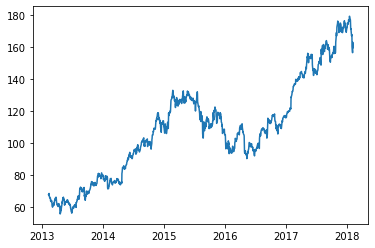

In [17]:
plt.plot(df_apple['date'], df_apple['close'])

In [18]:
# enumerate will return index and element that store in company
for index, company in enumerate(tech,1):
    print(index)
    print(company)

1
AAPL
2
AMZN
3
IBM
4
GOOG


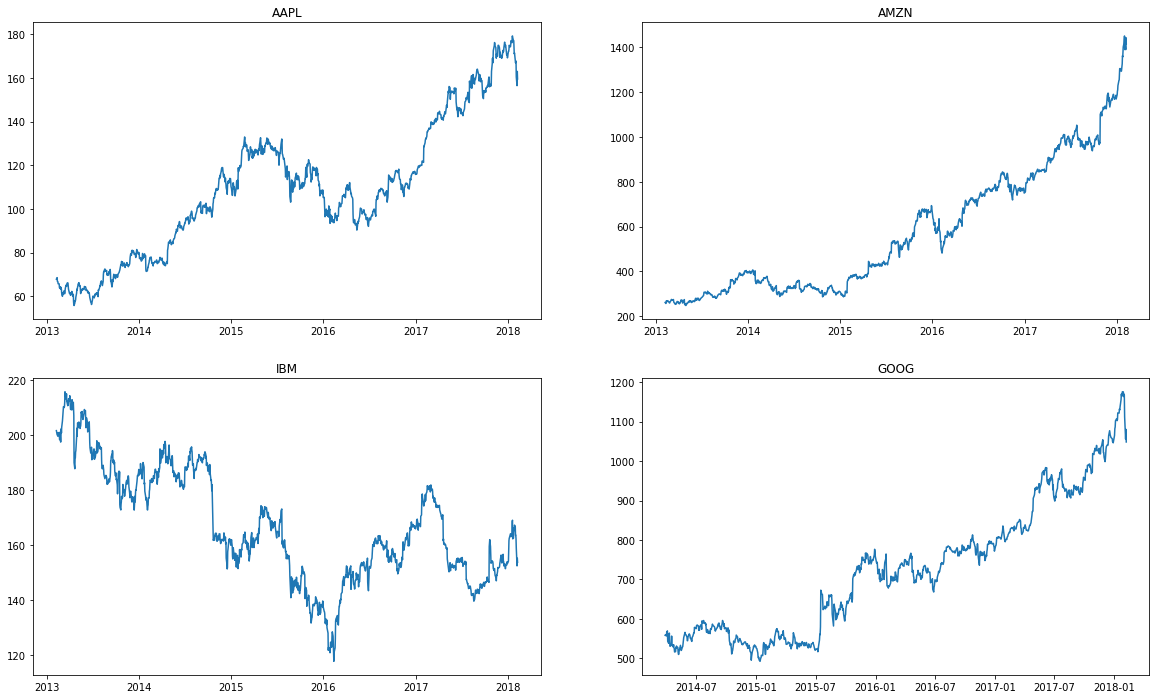

In [19]:
plt.figure(figsize=(20,12))
# automate for other company using LOOPS concept
for index, company in enumerate(tech, 1):
    plt.subplot(2, 2, index)
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['close'])
    plt.title(company)

## Build interactive Plots using Plotly

In [20]:
#!pip install plotly

In [21]:
import plotly.express as px

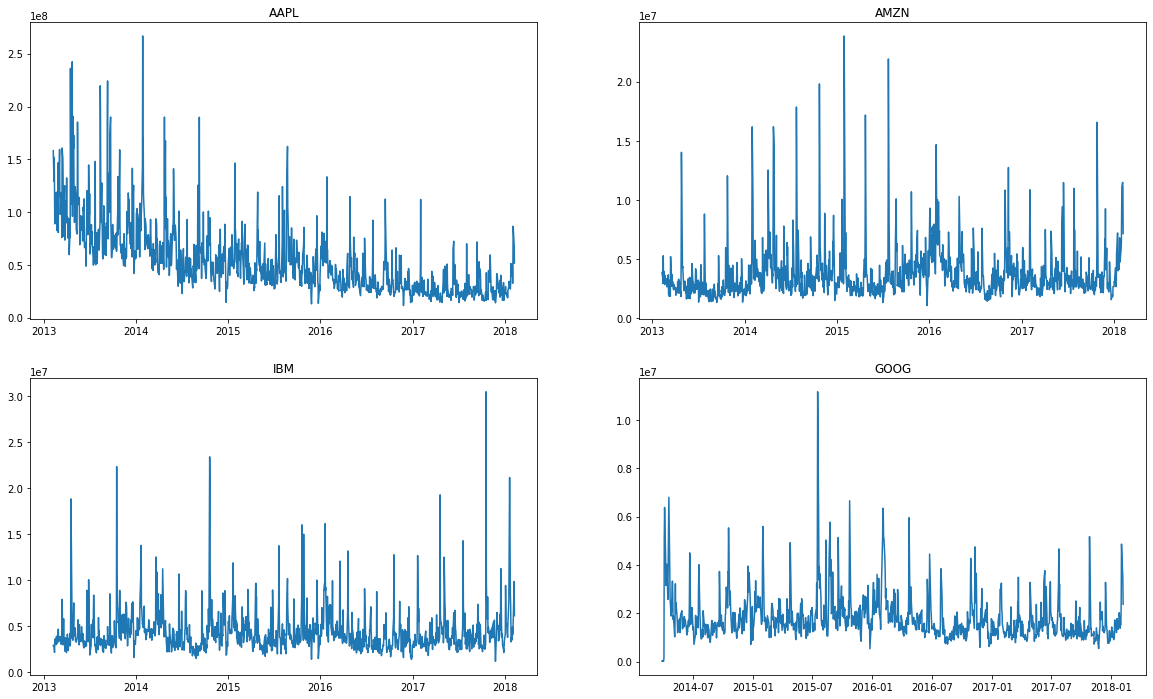

In [22]:
plt.figure(figsize=(20,12))
# automate for other company using LOOPS concept
for index, company in enumerate(tech, 1):
    plt.subplot(2, 2, index)
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['volume'])
    plt.title(company)

In [23]:
plt.figure(figsize=(20,12))
# automate for other company using LOOPS concept using PLOTLY
for index, company in enumerate(tech, 1):
    df = all_data[all_data['Name'] == company]
    fig = px.line(df, x='date', y='close', title = company)
    fig.show()

<Figure size 1440x864 with 0 Axes>

### 1. Analyze Daily Price Change in Stock (AMZN)

In [24]:
df = pd.read_csv(r'C:/Data_Fajar/Projects_2_Data_Analytics/individual_stocks_5yr/AMZN_data.csv')

In [25]:
df.head()

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [26]:
df['1day%_return'] = ((df['close']-df['open'])/df['close'])*100

In [27]:
df.head()

date    open    high      low   close   volume  Name  1day%_return
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN      0.209964
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN     -2.328836
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN     -0.189409
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN      2.946525
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN      0.694548

In [28]:
fig = px.line(df, x='date', y='1day%_return', title ='Daily Percentage Changes')
fig.show()

In [29]:
# using matplotlib
df.head()

date    open    high      low   close   volume  Name  1day%_return
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN      0.209964
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN     -2.328836
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN     -0.189409
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN      2.946525
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN      0.694548

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2016-04-18'),
  Text(0.0, 0, '2016-02-01'),
  Text(10.0, 0, '2016-02-16'),
  Text(20.0, 0, '2016-03-01'),
  Text(30.0, 0, '2016-03-15'),
  Text(40.0, 0, '2016-03-30'),
  Text(50.0, 0, '2016-04-13'),
  Text(60.0, 0, '2016-04-27'),
  Text(70.0, 0, '')])

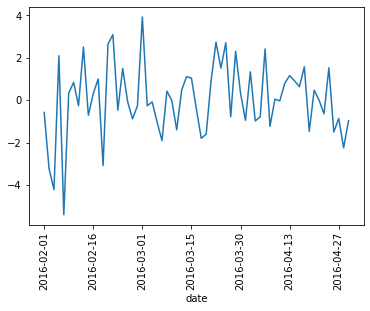

In [30]:
df.set_index('date')['2016-02-01':'2016-04-31']['1day%_return'].plot()
plt.xticks(rotation = 'vertical')

## Correlation Between the Features

### 1. Analyzing Monthly Closing Price

In [31]:
df.head()

date    open    high      low   close   volume  Name  1day%_return
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN      0.209964
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN     -2.328836
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN     -0.189409
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN      2.946525
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN      0.694548

In [32]:
df.dtypes

date             object
open            float64
high            float64
low             float64
close           float64
volume            int64
Name             object
1day%_return    float64
dtype: object

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df['date'].dtype

dtype('<M8[ns]')

In [35]:
df.head()

date    open    high      low   close   volume  Name  1day%_return
0 2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN      0.209964
1 2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN     -2.328836
2 2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN     -0.189409
3 2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN      2.946525
4 2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN      0.694548

In [36]:
df.set_index('date', inplace=True)

In [37]:
df.head()

open    high      low   close   volume  Name  1day%_return
date                                                                    
2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN      0.209964
2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN     -2.328836
2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN     -0.189409
2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN      2.946525
2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN      0.694548

<AxesSubplot:xlabel='date'>

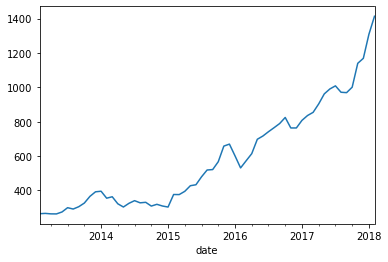

In [38]:
df['close'].resample('M').mean().plot()

### 2. Analyzing yearly closing price

<AxesSubplot:xlabel='date'>

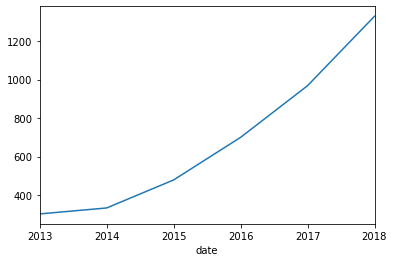

In [39]:
df['close'].resample('Y').mean().plot()

### 3. Is Stock Price for tech companies correlated?

In [40]:
all_data.head()

date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [41]:
def read_data(path, filename):
    return pd.read_csv(path+'/'+filename)

In [42]:
path = r'C:\Data_Fajar\Projects_2_Data_Analytics\individual_stocks_5yr'

In [43]:
aapl = read_data(path, 'AAPL_data.csv')

In [44]:
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [45]:
amzn = read_data(path, 'AMZN_data.csv')

In [46]:
ibm = read_data(path, 'IBM_data.csv')

In [47]:
goog = read_data(path, 'GOOG_data.csv')

In [48]:
close = pd.DataFrame()

In [49]:
close['aapl'] = aapl['close']
close['amzn'] = amzn['close']
close['ibm'] = ibm['close']
close['goog'] = goog['close']

In [50]:
close.head()

aapl    amzn     ibm    goog
0  67.8542  261.95  201.68  558.46
1  68.5614  257.21  200.16  559.99
2  66.8428  258.70  200.04  556.97
3  66.7156  269.47  200.09  567.16
4  66.6556  269.24  199.65  567.00

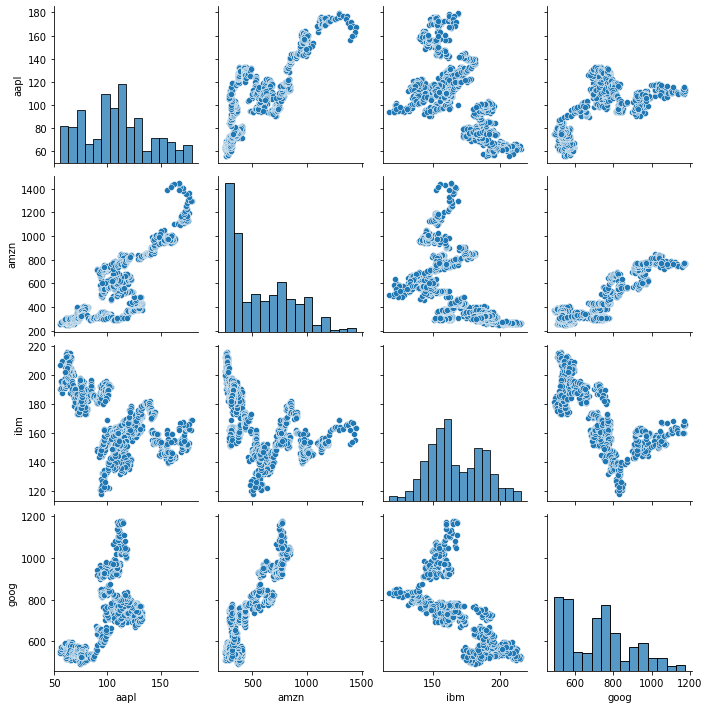

In [51]:
# using pairplot from seaborn for multivariate analysis
sns.pairplot(data = close)

<AxesSubplot:>

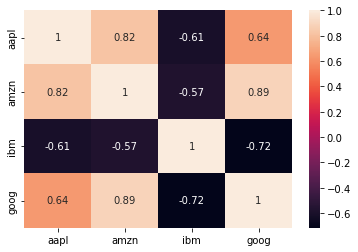

In [52]:
sns.heatmap(close.corr(), annot = True)

## Perform Value at Risk Analysis

In [53]:
data = pd.DataFrame()

In [54]:
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [55]:
data['aapl_change'] = ((aapl['close'] - aapl['open'])/ aapl['close'])*100
data['goog_change'] = ((goog['close'] - goog['open'])/ goog['close'])*100
data['amzn_change'] = ((amzn['close'] - amzn['open'])/ amzn['close'])*100
data['ibm_change'] = ((ibm['close'] - ibm['open'])/ ibm['close'])*100

In [56]:
data.head()

aapl_change  goog_change  amzn_change  ibm_change
0     0.206325    -1.708269     0.209964    0.847878
1     0.714688    -0.216075    -2.328836   -0.409672
2    -2.481344    -1.781065    -0.189409    0.014997
3    -0.042869     1.489879     2.946525   -0.279874
4     0.443624     0.334039     0.694548   -0.040070

<AxesSubplot:>

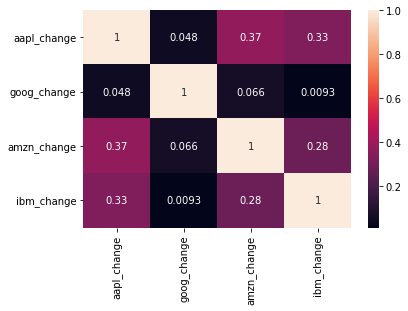

In [57]:
sns.heatmap(data.corr(), annot = True)

### 1. Value at Risk Analysis with respect to apple

<AxesSubplot:xlabel='aapl_change', ylabel='Density'>

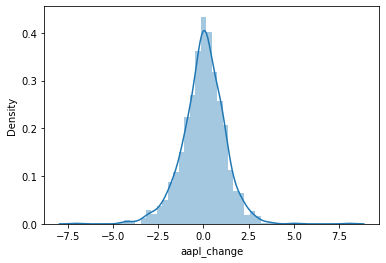

In [58]:
sns.distplot(data['aapl_change'])

In [59]:
data['aapl_change'].describe()

count    1259.000000
mean       -0.000215
std         1.187138
min        -7.104299
25%        -0.658021
50%         0.042230
75%         0.715427
max         8.000388
Name: aapl_change, dtype: float64

In [60]:
data['aapl_change'].quantile(0.1)
# means that 90% of time the daily loss will not exceed 1.42%

-1.4246644227944307

In [61]:
data.describe().T

count      mean       std       min       25%       50%  \
aapl_change  1259.0 -0.000215  1.187138 -7.104299 -0.658021  0.042230   
goog_change   975.0 -0.012495  1.092560 -5.952266 -0.551963  0.024951   
amzn_change  1259.0 -0.000398  1.358679 -9.363077 -0.738341 -0.002623   
ibm_change   1259.0  0.013804  0.874552 -4.242338 -0.486742  0.006366   

                  75%       max  
aapl_change  0.715427  8.000388  
goog_change  0.672649  4.943550  
amzn_change  0.852568  5.640265  
ibm_change   0.523663  3.250933

## Finding Relationship Between the Data

In [62]:
amzn_df = read_data(path, 'AMZN_data.csv')

In [63]:
amzn_df.head()

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [64]:
amzn_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [65]:
# we need trend of open feature using lineplot
fig = px.line(amzn_df, x = 'date', y = ['open', 'high', 'low', 'close'], title = 'Trend of Prices')
fig.show()

### 1. Relation between moving average and closing price

In [66]:
amzn_df['close'].head(10)

0    261.95
1    257.21
2    258.70
3    269.47
4    269.24
5    265.09
6    269.75
7    266.41
8    265.94
9    265.42
Name: close, dtype: float64

In [67]:
# create a model that can predict close feature using moving average method

In [68]:
amzn_df['10d_avg'] = amzn_df['close'].rolling(window = 10).mean()
amzn_df['50d_avg'] = amzn_df['close'].rolling(window = 50).mean()
amzn_df['100d_avg'] = amzn_df['close'].rolling(window = 100).mean()

In [69]:
amzn_df.tail()

date     open     high      low    close    volume  Name  \
1254  2018-02-01  1445.00  1459.88  1385.14  1390.00   9113808  AMZN   
1255  2018-02-02  1477.39  1498.00  1414.00  1429.95  11125722  AMZN   
1256  2018-02-05  1402.62  1458.98  1320.72  1390.00  11494985  AMZN   
1257  2018-02-06  1361.46  1443.99  1351.79  1442.84  11066819  AMZN   
1258  2018-02-07  1449.00  1460.99  1415.15  1416.78   7162741  AMZN   

       10d_avg    50d_avg   100d_avg  
1254  1381.833  1231.8294  1127.3103  
1255  1395.370  1237.9022  1131.8302  
1256  1401.639  1242.9124  1135.9044  
1257  1409.669  1248.6460  1140.3368  
1258  1415.596  1253.2616  1144.5825

In [70]:
amzn_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', '10d_avg',
       '50d_avg', '100d_avg'],
      dtype='object')

In [71]:
fig = px.line(amzn_df, x = 'date', y = ['close', '10d_avg', '50d_avg', '100d_avg'])
fig.show()

## Analyze Historical Price using Candle Sticks

In [72]:
amzn_df.head()

date    open    high      low   close   volume  Name  10d_avg  \
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN      NaN   
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN      NaN   
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN      NaN   
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN      NaN   
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN      NaN   

   50d_avg  100d_avg  
0      NaN       NaN  
1      NaN       NaN  
2      NaN       NaN  
3      NaN       NaN  
4      NaN       NaN

In [73]:
amzn_df.dtypes

date         object
open        float64
high        float64
low         float64
close       float64
volume        int64
Name         object
10d_avg     float64
50d_avg     float64
100d_avg    float64
dtype: object

In [74]:
amzn_df['date'] = pd.to_datetime(amzn_df['date'])

In [75]:
amzn_df.tail()

date     open     high      low    close    volume  Name   10d_avg  \
1254 2018-02-01  1445.00  1459.88  1385.14  1390.00   9113808  AMZN  1381.833   
1255 2018-02-02  1477.39  1498.00  1414.00  1429.95  11125722  AMZN  1395.370   
1256 2018-02-05  1402.62  1458.98  1320.72  1390.00  11494985  AMZN  1401.639   
1257 2018-02-06  1361.46  1443.99  1351.79  1442.84  11066819  AMZN  1409.669   
1258 2018-02-07  1449.00  1460.99  1415.15  1416.78   7162741  AMZN  1415.596   

        50d_avg   100d_avg  
1254  1231.8294  1127.3103  
1255  1237.9022  1131.8302  
1256  1242.9124  1135.9044  
1257  1248.6460  1140.3368  
1258  1253.2616  1144.5825

In [76]:
import datetime as dt

In [77]:
last_year = amzn_df[amzn_df['date'].dt.year > 2017]

In [78]:
last_year

date     open     high      low    close    volume  Name   10d_avg  \
1233 2018-01-02  1172.00  1190.00  1170.51  1189.01   2694494  AMZN  1180.230   
1234 2018-01-03  1188.30  1205.49  1188.30  1204.20   3108793  AMZN  1181.592   
1235 2018-01-04  1205.00  1215.87  1204.66  1209.59   3022089  AMZN  1183.813   
1236 2018-01-05  1217.51  1229.14  1210.00  1229.14   3544743  AMZN  1188.965   
1237 2018-01-08  1236.00  1253.08  1232.03  1246.87   4279475  AMZN  1196.176   
1238 2018-01-09  1256.90  1259.33  1241.76  1252.70   3661316  AMZN  1204.610   
1239 2018-01-10  1245.15  1254.33  1237.23  1254.33   2686017  AMZN  1212.367   
1240 2018-01-11  1259.74  1276.77  1256.46  1276.68   3125048  AMZN  1221.809   
1241 2018-01-12  1273.39  1305.76  1273.39  1305.20   5443730  AMZN  1233.719   
1242 2018-01-16  1323.00  1339.94  1292.30  1304.86   7220701  AMZN  1247.258   
1243 2018-01-17  1312.24  1314.00  1280.88  1295.00   5253754  AMZN  1257.857   
1244 2018-01-18  1293.95  1304.60  1284.02  1293.32   4026915  AMZN  1266.769   
1245 2018-01-19  1312.00  1313.00  1292.99  1294.58   4578536  AMZN  1275.268   
1246 2018-01-22  1297.17  1327.45  1296.66  1327.31   4140061  AMZN  1285.085   
1247 2018-01-23  1338.09  1364.90  1337.34  1362.54   5169306  AMZN  1296.652   
1248 2018-01-24  1374.82  1388.16  1338.00  1357.51   6807457  AMZN  1307.133   
1249 2018-01-25  1368.00  1378.34  1357.62  1377.95   4753012  AMZN  1319.495   
1250 2018-01-26  1392.01  1402.53  1380.91  1402.05   4857310  AMZN  1332.032   
1251 2018-01-29  1409.18  1431.39  1400.44  1417.68   5701898  AMZN  1343.280   
1252 2018-01-30  1403.17  1439.25  1392.00  1437.82   5871942  AMZN  1356.576   
1253 2018-01-31  1451.30  1472.58  1450.04  1450.89   6424693  AMZN  1372.165   
1254 2018-02-01  1445.00  1459.88  1385.14  1390.00   9113808  AMZN  1381.833   
1255 2018-02-02  1477.39  1498.00  1414.00  1429.95  11125722  AMZN  1395.370   
1256 2018-02-05  1402.62  1458.98  1320.72  1390.00  11494985  AMZN  1401.639   
1257 2018-02-06  1361.46  1443.99  1351.79  1442.84  11066819  AMZN  1409.669   
1258 2018-02-07  1449.00  1460.99  1415.15  1416.78   7162741  AMZN  1415.596   

        50d_avg   100d_avg  
1233  1133.7868  1053.0984  
1234  1138.2126  1055.5712  
1235  1143.0784  1057.9872  
1236  1148.1432  1060.4456  
1237  1153.6224  1063.0869  
1238  1159.2278  1065.8321  
1239  1162.2954  1068.7697  
1240  1165.6120  1071.9518  
1241  1169.6104  1075.4709  
1242  1173.6340  1078.8505  
1243  1177.6496  1082.2205  
1244  1181.2840  1085.6292  
1245  1184.7624  1089.1224  
1246  1188.8452  1092.9353  
1247  1193.4384  1097.0201  
1248  1198.0060  1100.9193  
1249  1203.0580  1104.8928  
1250  1208.5156  1109.1308  
1251  1214.1324  1113.6549  
1252  1220.3550  1118.3551  
1253  1226.6270  1123.0693  
1254  1231.8294  1127.3103  
1255  1237.9022  1131.8302  
1256  1242.9124  1135.9044  
1257  1248.6460  1140.3368  
1258  1253.2616  1144.5825

In [80]:
monthly_average = last_year.groupby(['date']).agg({'open':'mean', 'high':'mean', 'low':'mean', 'close':'mean'})

In [82]:
monthly_average.reset_index(inplace = True)

In [83]:
monthly_average

date     open     high      low    close
0  2018-01-02  1172.00  1190.00  1170.51  1189.01
1  2018-01-03  1188.30  1205.49  1188.30  1204.20
2  2018-01-04  1205.00  1215.87  1204.66  1209.59
3  2018-01-05  1217.51  1229.14  1210.00  1229.14
4  2018-01-08  1236.00  1253.08  1232.03  1246.87
5  2018-01-09  1256.90  1259.33  1241.76  1252.70
6  2018-01-10  1245.15  1254.33  1237.23  1254.33
7  2018-01-11  1259.74  1276.77  1256.46  1276.68
8  2018-01-12  1273.39  1305.76  1273.39  1305.20
9  2018-01-16  1323.00  1339.94  1292.30  1304.86
10 2018-01-17  1312.24  1314.00  1280.88  1295.00
11 2018-01-18  1293.95  1304.60  1284.02  1293.32
12 2018-01-19  1312.00  1313.00  1292.99  1294.58
13 2018-01-22  1297.17  1327.45  1296.66  1327.31
14 2018-01-23  1338.09  1364.90  1337.34  1362.54
15 2018-01-24  1374.82  1388.16  1338.00  1357.51
16 2018-01-25  1368.00  1378.34  1357.62  1377.95
17 2018-01-26  1392.01  1402.53  1380.91  1402.05
18 2018-01-29  1409.18  1431.39  1400.44  1417.68
19 2018-01-30  1403.17  1439.25  1392.00  1437.82
20 2018-01-31  1451.30  1472.58  1450.04  1450.89
21 2018-02-01  1445.00  1459.88  1385.14  1390.00
22 2018-02-02  1477.39  1498.00  1414.00  1429.95
23 2018-02-05  1402.62  1458.98  1320.72  1390.00
24 2018-02-06  1361.46  1443.99  1351.79  1442.84
25 2018-02-07  1449.00  1460.99  1415.15  1416.78

In [84]:
monthly_average.columns

Index(['date', 'open', 'high', 'low', 'close'], dtype='object')

In [88]:
#!pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=0004293b2abb2a1125ecb089a7146bce4232aa149a2e39a281ea7961c897db24
  Stored in directory: c:\users\fajar\appdata\local\pip\cache\wheels\ac\cb\8a\b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [89]:
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import iplot, download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected = True)

In [90]:
trace = go.Candlestick(x=monthly_average['date'], open = monthly_average['open'].values.tolist(),
              high = monthly_average['high'].values.tolist(), low = monthly_average['low'].values.tolist(),
              close = monthly_average['close'].values.tolist())

In [94]:
layout = {
    'title': 'Amazon history price',
    'xaxis':{
        'title':'Date',
        'rangeslider':{'visible':False}},
    'yaxis':{'title':'Stock Price (USD)'}
}

In [95]:
data = [trace]

In [97]:
fig = go.Figure(data, layout = layout)
iplot(fig)

## Data Preparation for Time Series Modelling

In [98]:
# type of scenario that easily handle by fbprophet
#1. hourly, weekly, daily
#2. holidays that has irregular pattern
#3. missing & outliers treatment in data
#4. historical trend changes
#5. non linear trend

In [99]:
from fbprophet import Prophet

In [100]:
m = Prophet()

In [102]:
df.head()

open    high      low   close   volume  Name  1day%_return
date                                                                    
2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN      0.209964
2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN     -2.328836
2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN     -0.189409
2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN      2.946525
2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN      0.694548

Index(['open', 'high', 'low', 'close', 'volume', 'Name', '1day%_return'], dtype='object')

In [105]:
df.drop(['open', 'high', 'low', 'volume', 'Name'], axis = 1, inplace = True)

In [107]:
df.drop('1day%_return', axis =1, inplace =True)

In [110]:
df = df.reset_index()

In [112]:
df.head()

date   close
0 2013-02-08  261.95
1 2013-02-11  257.21
2 2013-02-12  258.70
3 2013-02-13  269.47
4 2013-02-14  269.24

In [113]:
df.columns = ['ds', 'y']

In [115]:
df.head()

ds       y
0 2013-02-08  261.95
1 2013-02-11  257.21
2 2013-02-12  258.70
3 2013-02-13  269.47
4 2013-02-14  269.24

In [116]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
future_price = m.make_future_dataframe(periods = 365)

## Build & Interpret Fbprophet Model

In [122]:
future_price.head()

ds
0 2013-02-08
1 2013-02-11
2 2013-02-12
3 2013-02-13
4 2013-02-14

In [120]:
forecast = m.predict(future_price)

In [121]:
forecast.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-02-08  232.589396  217.140632  299.869944   232.589396   232.589396   
1 2013-02-11  234.028371  213.074388  291.264869   234.028371   234.028371   
2 2013-02-12  234.508030  213.292309  292.931260   234.508030   234.508030   
3 2013-02-13  234.987688  212.714821  290.497890   234.987688   234.987688   
4 2013-02-14  235.467346  212.662607  291.487860   235.467346   235.467346   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       24.820956             24.820956             24.820956 -5.588764   
1       20.068901             20.068901             20.068901 -5.344925   
2       18.635632             18.635632             18.635632 -5.356313   
3       17.314791             17.314791             17.314791 -5.410497   
4       15.861331             15.861331             15.861331 -5.766492   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0     -5.588764     -5.588764  30.409721     30.409721     30.409721   
1     -5.344925     -5.344925  25.413826     25.413826     25.413826   
2     -5.356313     -5.356313  23.991946     23.991946     23.991946   
3     -5.410497     -5.410497  22.725287     22.725287     22.725287   
4     -5.766492     -5.766492  21.627823     21.627823     21.627823   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper        yhat  
0                         0.0  257.410352  
1                         0.0  254.097273  
2                         0.0  253.143662  
3                         0.0  252.302479  
4                         0.0  251.328677

In [124]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
1619 2019-02-03  1740.081576  1406.381389  2110.000669
1620 2019-02-04  1720.516828  1372.432890  2082.349914
1621 2019-02-05  1719.934192  1387.766284  2077.214627
1622 2019-02-06  1719.256906  1385.554129  2086.183883
1623 2019-02-07  1718.259273  1392.135421  2082.695571

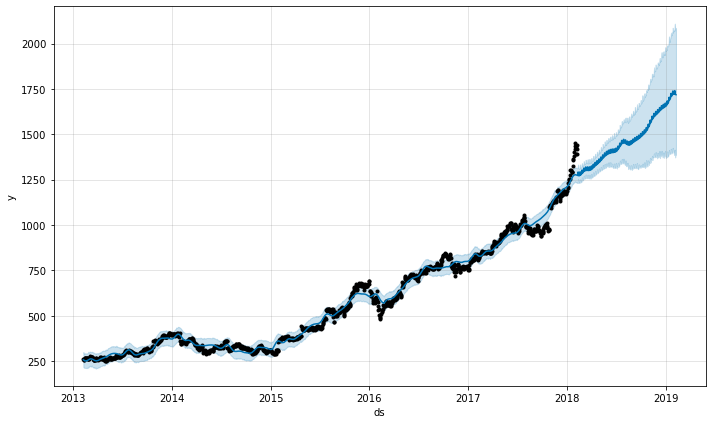

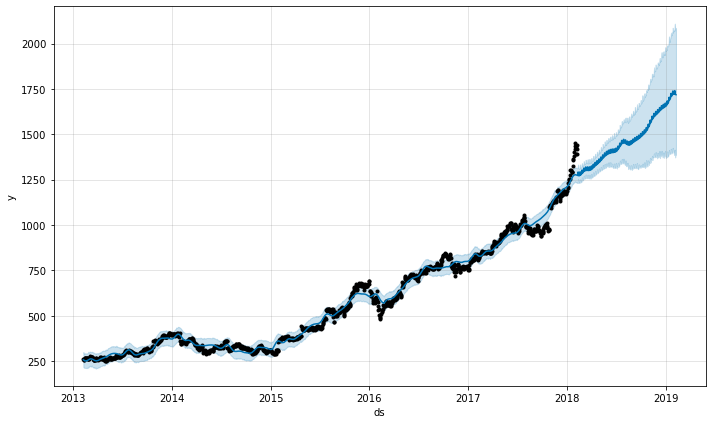

In [125]:
m.plot(forecast)
# black dots is actual data point
# blue curve is prediction

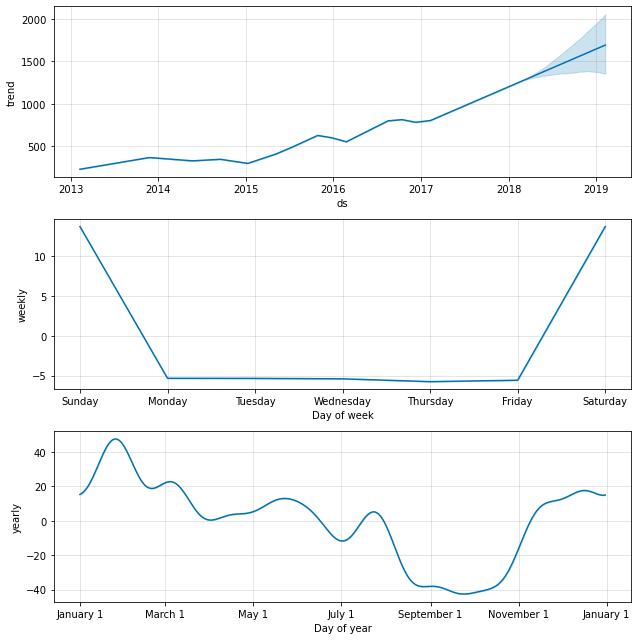

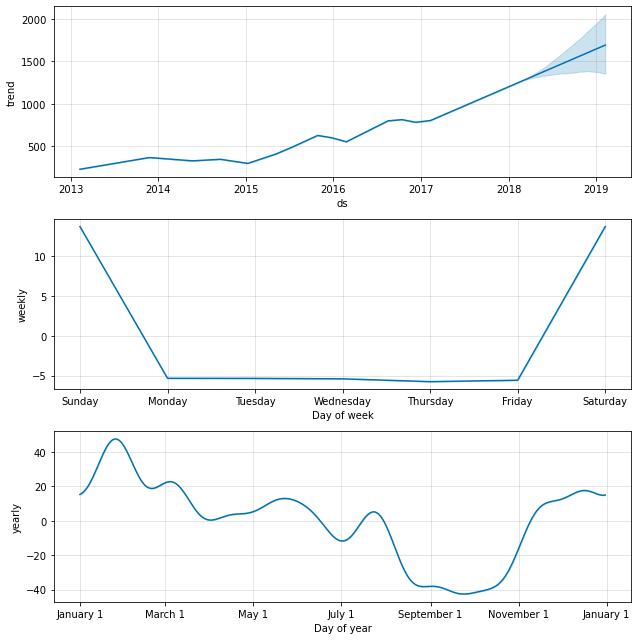

In [126]:
m.plot_components(forecast)

### lets say you want to make prediction monthly basis

In [127]:
model = Prophet(changepoint_prior_scale=0.01)

In [129]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
future_price2 = model.make_future_dataframe(periods = 60, freq = 'M')

In [131]:
df.shape

(1259, 2)

In [133]:
future_price2.shape

(1319, 1)

In [134]:
forecast2 = m.predict(future_price2)

Text(0.5, 1.0, 'Monthly Prediction in 60 Months')

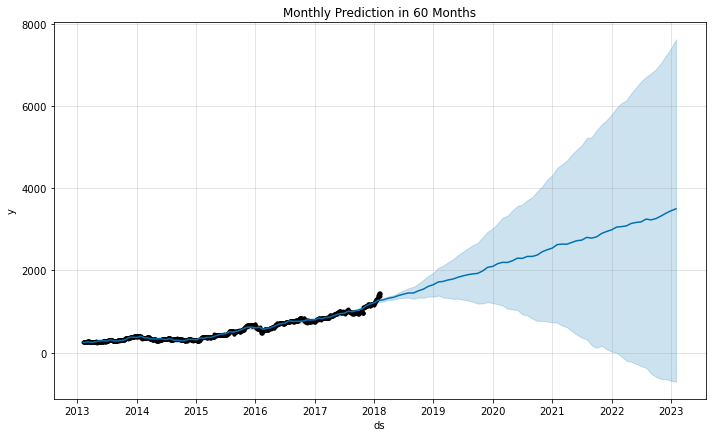

In [135]:
m.plot(forecast2)
plt.title('Monthly Prediction in 60 Months')

## Predicting Land Temperature in Indonesia